In [2]:
# Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 2000)
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Import survey data
path = r'data/multi_morbidity_survey_data_nov23.csv'
results = pd.read_csv(path)

In [4]:
results
results.info()

,1,2,3,4,5,6,7,8,9,10,medical_speciality
0,snomed,one_hot,snomed,snomed,one_hot,snomed,one_hot,snomed,one_hot,snomed,ID
1,one_hot,snomed,rocheteau,other,snomed,rocheteau,rocheteau,rocheteau,one_hot,snomed,ID
2,snomed,one_hot,snomed,snomed,one_hot,snomed,rocheteau,snomed,one_hot,snomed,ID
3,one_hot,snomed,rocheteau,other,one_hot,rocheteau,snomed,one_hot,rocheteau,snomed,internal_medicine
4,snomed,one_hot,snomed,snomed,one_hot,snomed,one_hot,rocheteau,snomed,snomed,internal_medicine
5,snomed,snomed,snomed,snomed,snomed,rocheteau,rocheteau,snomed,snomed,snomed,ICU
6,snomed,snomed,rocheteau,snomed,one_hot,snomed,one_hot,snomed,one_hot,other,gastroenterology
7,snomed,one_hot,rocheteau,snomed,snomed,snomed,one_hot,snomed,snomed,snomed,ID
8,snomed,one_hot,snomed,snomed,one_hot,snomed,one_hot,snomed,snomed,snomed,GP
9,snomed,one_hot,snomed,snomed,one_hot,rocheteau,one_hot,snomed,one_hot,snomed,ID


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   1                   20 non-null     object
 1   2                   20 non-null     object
 2   3                   20 non-null     object
 3   4                   20 non-null     object
 4   5                   20 non-null     object
 5   6                   20 non-null     object
 6   7                   20 non-null     object
 7   8                   20 non-null     object
 8   9                   20 non-null     object
 9   10                  20 non-null     object
 10  medical_speciality  19 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


In [141]:
results['medical_speciality'].value_counts()
results['medical_speciality'].nunique()

ID                   7
internal_medicine    3
GP                   3
ICU                  2
gastroenterology     1
pharmacist           1
radiology            1
gynaecology          1
Name: medical_speciality, dtype: int64

8

In [6]:
# Get total number of votes for each method 
pd.melt(results.iloc[:,:-1])['value'].value_counts()

snomed       106
one_hot       57
rocheteau     31
other          6
Name: value, dtype: int64

In [4]:
# Get winner for each question
winner_df = results.iloc[:,:-1].mode().T
winner_df.columns = ['question']
winner_df
winner_df.value_counts()

,question
1,snomed
2,one_hot
3,snomed
4,snomed
5,one_hot
6,snomed
7,one_hot
8,snomed
9,one_hot
10,snomed


question
snomed      6
one_hot     4
dtype: int64

In [5]:
# Get frequency and percentages for all
melted_df = pd.melt(results.iloc[:,:-1], value_vars=results.iloc[:,:-1].columns)
frequency_df = melted_df.pivot_table(index='value', columns='variable', aggfunc='size', fill_value=np.nan)
frequency_df.columns = frequency_df.columns.to_list()
percentage_df = frequency_df.div(frequency_df.sum(axis=0), axis=1) * 100

In [6]:
# Change order as question 10 moves for some reason 
frequency_df = frequency_df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
percentage_df = percentage_df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]

In [71]:
frequency_df
percentage_df

,1,2,3,4,5,6,7,8,9,10
value,,,,,,,,,,
one_hot,9.0,13.0,1.0,NaN,12.0,2.0,10.0,1.0,9.0,NaN
other,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0
rocheteau,NaN,1.0,9.0,NaN,NaN,7.0,7.0,3.0,4.0,NaN
snomed,11.0,6.0,10.0,16.0,8.0,11.0,3.0,16.0,7.0,18.0


,1,2,3,4,5,6,7,8,9,10
value,,,,,,,,,,
one_hot,45.0,65.0,5.0,NaN,60.0,10.0,50.0,5.0,45.0,NaN
other,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,10.0
rocheteau,NaN,5.0,45.0,NaN,NaN,35.0,35.0,15.0,20.0,NaN
snomed,55.0,30.0,50.0,80.0,40.0,55.0,15.0,80.0,35.0,90.0


In [57]:
# Get average proportion of the vote
for index, row in percentage_df.iterrows():
    print(index)
    print('mean,', percentage_df.loc[index].mean())
    print('std,', percentage_df.loc[index].std())

one_hot
mean, 35.625
std, 24.991069833613995
other
mean, 15.0
std, 7.0710678118654755
rocheteau
mean, 25.833333333333332
std, 14.972196454317139
snomed
mean, 53.0
std, 24.289915602982237


In [58]:
print('one_hot with other mean,', np.mean([35.625, 15.0]))
print('rocheteau with other mean,', np.mean([25.833333333333332, 15.0]))

one_hot with other mean, 25.3125
rocheteau with other mean, 20.416666666666664


In [42]:
# Get percentages for those our method won
snomed_questions = winner_df[winner_df['question'] == 'snomed'].index.to_list()
snomed_df = results.loc[:,snomed_questions]
melted_df = pd.melt(snomed_df, value_vars=snomed_df.columns)
snomed_frequency_df = melted_df.pivot_table(index='value', columns='variable', aggfunc='size', fill_value=np.nan)
snomed_frequency_df.columns = snomed_frequency_df.columns.to_list()
snomed_percentage_df = snomed_frequency_df.div(snomed_frequency_df.sum(axis=0), axis=1) * 100

In [43]:
snomed_frequency_df
snomed_percentage_df

,1,10,3,4,6,8
value,,,,,,
one_hot,9.0,NaN,1.0,NaN,2.0,1.0
other,NaN,2.0,NaN,4.0,NaN,NaN
rocheteau,NaN,NaN,9.0,NaN,7.0,3.0
snomed,11.0,18.0,10.0,16.0,11.0,16.0


,1,10,3,4,6,8
value,,,,,,
one_hot,45.0,NaN,5.0,NaN,10.0,5.0
other,NaN,10.0,NaN,20.0,NaN,NaN
rocheteau,NaN,NaN,45.0,NaN,35.0,15.0
snomed,55.0,90.0,50.0,80.0,55.0,80.0


In [50]:
# For those our method won get the average proportion of the vote
snomed_percentage_df.loc['snomed'].mean()
snomed_percentage_df.loc['snomed'].std()

68.33333333333333

16.931233465600393

In [61]:
# Work out percentage by which snomed won
# Calculate the winning option for each column
winning_option = snomed_percentage_df.idxmax()

# Initialize an empty DataFrame to store the percentage differences
snomed_percentage_difference_df = pd.DataFrame()

# Loop through each column (question)
for column in snomed_percentage_df.columns:
    # Find the winning option for the current column
    winner = winning_option[column]
    
    # Find the percentage of votes for the winning option
    winning_percentage = snomed_percentage_df.loc[winner, column]
    
    # Find the second-highest percentage of votes
    second_highest_percentage = snomed_percentage_df.drop(winner).max(axis=0)[column]
    
    # Calculate the percentage difference
    percentage_difference = winning_percentage - second_highest_percentage
    
    # Add the percentage difference to the new DataFrame
    snomed_percentage_difference_df[column] = [percentage_difference]

In [65]:
snomed_percentage_difference_df
print('mean percentage winning margin,', snomed_percentage_difference_df.T.mean())
print('std percentage winning margin,', snomed_percentage_difference_df.T.std())

,1,10,3,4,6,8
0,10.0,80.0,5.0,60.0,20.0,65.0


mean percentage winning margin, 0    40.0
dtype: float64
std percentage winning margin, 0    32.093613
dtype: float64


In [63]:
# For those one_hot won get the average proportion of the vote
# Get percentages for those they won
one_hot_questions = winner_df[winner_df['question'] == 'one_hot'].index.to_list()
one_hot_df = results.loc[:,one_hot_questions]
melted_df = pd.melt(one_hot_df, value_vars=one_hot_df.columns)
one_hot_frequency_df = melted_df.pivot_table(index='value', columns='variable', aggfunc='size', fill_value=np.nan)
one_hot_frequency_df.columns = one_hot_frequency_df.columns.to_list()
one_hot_percentage_df = one_hot_frequency_df.div(one_hot_frequency_df.sum(axis=0), axis=1) * 100
# Work out percentage by which they won
# Calculate the winning option for each column
winning_option = one_hot_percentage_df.idxmax()

# Initialize an empty DataFrame to store the percentage differences
one_hot_percentage_difference_df = pd.DataFrame()

# Loop through each column (question)
for column in one_hot_percentage_df.columns:
    # Find the winning option for the current column
    winner = winning_option[column]
    
    # Find the percentage of votes for the winning option
    winning_percentage = one_hot_percentage_df.loc[winner, column]
    
    # Find the second-highest percentage of votes
    second_highest_percentage = one_hot_percentage_df.drop(winner).max(axis=0)[column]
    
    # Calculate the percentage difference
    percentage_difference = winning_percentage - second_highest_percentage
    
    # Add the percentage difference to the new DataFrame
    one_hot_percentage_difference_df[column] = [percentage_difference]

In [66]:
one_hot_frequency_df
one_hot_percentage_df
# For those our method won get the average proportion of the vote
print('mean proportion of the vote for those one_hot won,', one_hot_percentage_df.loc['one_hot'].mean())
print('std for proportion of the vote for those one_hot won,',one_hot_percentage_df.loc['one_hot'].std())
one_hot_percentage_difference_df
print('mean percentage winning margin,', one_hot_percentage_difference_df.T.mean())
print('mean percentage winning margin,', one_hot_percentage_difference_df.T.std())

,2,5,7,9
value,,,,
one_hot,13,12.0,10,9
rocheteau,1,NaN,7,4
snomed,6,8.0,3,7


,2,5,7,9
value,,,,
one_hot,65.0,60.0,50.0,45.0
rocheteau,5.0,NaN,35.0,20.0
snomed,30.0,40.0,15.0,35.0


mean proportion of the vote for those one_hot won, 55.0
std for proportion of the vote for those one_hot won, 9.128709291752768


,2,5,7,9
0,35.0,20.0,15.0,10.0


mean percentage winning margin, 0    20.0
dtype: float64
mean percentage winning margin, 0    10.801234
dtype: float64


In [158]:
percentage_df

,1,2,3,4,5,6,7,8,9,10
value,,,,,,,,,,
one_hot,45.0,65.0,5.0,NaN,60.0,10.0,50.0,5.0,45.0,NaN
other,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,10.0
rocheteau,NaN,5.0,45.0,NaN,NaN,35.0,35.0,15.0,20.0,NaN
snomed,55.0,30.0,50.0,80.0,40.0,55.0,15.0,80.0,35.0,90.0


<AxesSubplot:>

Text(0.5, 1.0, 'Milti-morbid patient similarity survey results')

Text(0.5, 0, 'Question')

Text(0, 0.5, 'Percentage of Votes')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

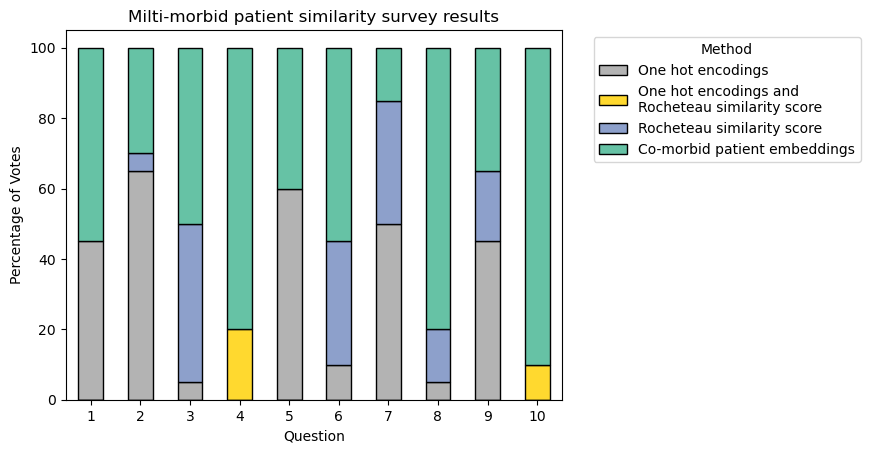

In [14]:
# Stacked Bar Plot
#plt.figure(figsize=(20, 16))
percentage_df.T.plot(kind='bar', stacked=True, colormap='Set2_r', edgecolor='black')
plt.title('Milti-morbid patient similarity survey results')
plt.xlabel('Question')
plt.ylabel('Percentage of Votes')
L = plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
L.get_texts()[0].set_text('One hot encodings')
L.get_texts()[1].set_text('One hot encodings and \nRocheteau similarity score')
L.get_texts()[2].set_text('Rocheteau similarity score')
L.get_texts()[3].set_text('Co-morbid patient embeddings')
#plt.tight_layout()
plt.xticks(rotation=360) # Needed to get ticks upright for some reason?
plt.show()

In [140]:
# Extract the columns that represent survey questions
# In this example, all columns except 'medical_speciality'
question_columns = results.columns.difference(['medical_speciality', 'MCA1', 'MCA2', 'cluster'])

# Calculate entropy for each question
entropy_per_question = results[question_columns].apply(lambda col: -np.sum((col.value_counts() / len(col)) * np.log2(col.value_counts() / len(col))))

# Display the entropy for each question
print("Entropy per question:\n", entropy_per_question)

# Gini Index
gini_index_per_question = 1 - results[question_columns].apply(lambda col: sum((col.value_counts() / len(col))**2))
print("Gini Index per question:\n", gini_index_per_question)
print("Mean Gini Index accross question:\n", gini_index_per_question.mean())
print("Std Gini Index accross question:\n", gini_index_per_question.std())

Entropy per question:
 1     0.992774
10    0.468996
2     1.141154
3     1.234498
4     0.721928
5     0.970951
6     1.336666
7     1.440645
8     0.884184
9     1.512888
dtype: float64
Gini Index per question:
 1     0.495
10    0.180
2     0.485
3     0.545
4     0.320
5     0.480
6     0.565
7     0.605
8     0.335
9     0.635
dtype: float64
Mean Gini Index accross question:
 0.46449999999999997
Std Gini Index accross question:
 0.143593755667392


In [ ]:
# Do chi-square test to see if differences between specialities

In [121]:
from scipy.stats import chi2_contingency


# Get a list of all question columns (excluding 'medical_speciality')
question_columns = results.columns.difference(['medical_speciality'])

# Perform Chi-Square Test for each question
for question_column in question_columns:
    observed_table = pd.crosstab(results['medical_speciality'], results[question_column])
    chi2, p, dof, expected = chi2_contingency(observed_table)
    print(question_column)
    print(f"\nChi-Square Test for {question_column} against medical_speciality:")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    alpha = 0.05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    #print("Degrees of Freedom:", dof)
    #print("Expected Frequencies Table:")
    #print(pd.DataFrame(expected, index=observed_table.index, columns=observed_table.columns))

1

Chi-Square Test for 1 against medical_speciality:
Chi-Square Statistic: 5.618777056277056
P-value: 0.5848984495947852
Independent (fail to reject H0)
10

Chi-Square Test for 10 against medical_speciality:
Chi-Square Statistic: 9.899159663865547
P-value: 0.19436039275355588
Independent (fail to reject H0)
2

Chi-Square Test for 2 against medical_speciality:
Chi-Square Statistic: 11.950396825396826
P-value: 0.6102864230598011
Independent (fail to reject H0)
3

Chi-Square Test for 3 against medical_speciality:
Chi-Square Statistic: 22.833928571428572
P-value: 0.06302624841237496
Independent (fail to reject H0)
4

Chi-Square Test for 4 against medical_speciality:
Chi-Square Statistic: 6.823412698412699
P-value: 0.4474949315997202
Independent (fail to reject H0)
5

Chi-Square Test for 5 against medical_speciality:
Chi-Square Statistic: 6.618764172335601
P-value: 0.46962236888711384
Independent (fail to reject H0)
6

Chi-Square Test for 6 against medical_speciality:
Chi-Square Statistic: 

In [145]:
# Get a list of all question columns (excluding 'medical_speciality')
results_copy = results.copy()

def f(row):
    if row['medical_speciality'] == 'ID':
        return 'ID'
    else:
        return 'other'
# Group into ID and other and compare
results_copy['medical_speciality_2'] = results_copy.apply(f, axis=1)
results_copy.drop(columns=['MCA1', 'MCA2', 'cluster', 'medical_speciality'], inplace=True)
question_columns = results_copy.columns.difference(['medical_speciality_2'])

# Perform Chi-Square Test for each question
for question_column in question_columns:
    observed_table = pd.crosstab(results_copy['medical_speciality_2'], results_copy[question_column])
    chi2, p, dof, expected = chi2_contingency(observed_table)
    print(question_column)
    print(f"\nChi-Square Test for {question_column} against medical_speciality:")
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    alpha = 0.05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

1

Chi-Square Test for 1 against medical_speciality:
Chi-Square Statistic: 0.3751803751803752
P-value: 0.5401939723107335
Independent (fail to reject H0)
10

Chi-Square Test for 10 against medical_speciality:
Chi-Square Statistic: 0.0
P-value: 1.0
Independent (fail to reject H0)
2

Chi-Square Test for 2 against medical_speciality:
Chi-Square Statistic: 0.6142575373344603
P-value: 0.7355558782586129
Independent (fail to reject H0)
3

Chi-Square Test for 3 against medical_speciality:
Chi-Square Statistic: 0.6593406593406592
P-value: 0.7191607803276518
Independent (fail to reject H0)
4

Chi-Square Test for 4 against medical_speciality:
Chi-Square Statistic: 0.0
P-value: 1.0
Independent (fail to reject H0)
5

Chi-Square Test for 5 against medical_speciality:
Chi-Square Statistic: 0.448717948717949
P-value: 0.5029444096390316
Independent (fail to reject H0)
6

Chi-Square Test for 6 against medical_speciality:
Chi-Square Statistic: 1.73255316112459
P-value: 0.4205143893385689
Independent (fa

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint16)

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
      dtype=uint16)

array([1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1],
      dtype=uint16)

array([1, 3, 1, 3, 1, 3, 1, 1, 1, 2, 0, 3, 2, 3, 0, 3, 1, 0, 3, 1],
      dtype=uint16)

array([0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 2, 4, 0, 3, 2, 3, 0, 2, 1, 0],
      dtype=uint16)

array([1, 5, 4, 5, 1, 5, 3, 1, 1, 2, 0, 5, 2, 5, 0, 5, 1, 0, 5, 1],
      dtype=uint16)

array([0, 3, 0, 3, 1, 3, 0, 4, 1, 0, 6, 3, 0, 3, 0, 3, 1, 6, 5, 2],
      dtype=uint16)

array([2, 6, 1, 6, 2, 0, 4, 4, 2, 3, 7, 0, 3, 0, 1, 0, 4, 1, 5, 2],
      dtype=uint16)

array([2, 0, 2, 0, 7, 5, 6, 6, 7, 4, 1, 5, 4, 5, 8, 5, 6, 1, 0, 3],
      dtype=uint16)

array([2, 5, 6, 5, 0, 8, 2, 7, 7, 4, 1, 5, 4, 8, 3, 8, 7, 1, 9, 2],
      dtype=uint16)

<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow method for kmodes clusters')

Text(0.5, 0, 'Number of Clusters')

([<matplotlib.axis.XTick at 0x7ff6b8405f10>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

Text(0, 0.5, 'Cost')

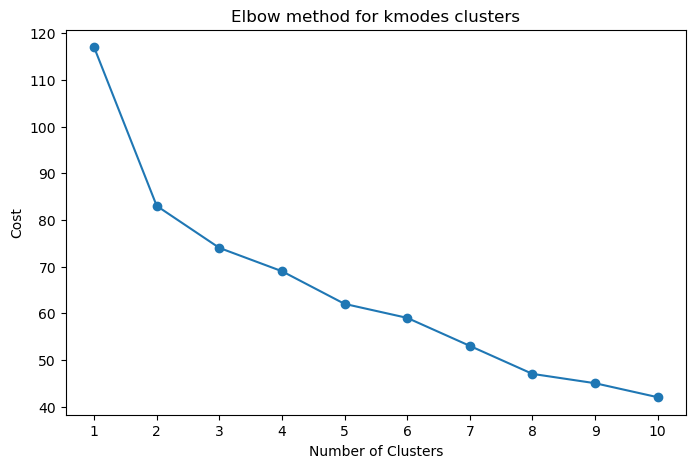

In [162]:
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder

# Extract the columns that you want to use for clustering
# In this example, we're using all columns except 'medical_speciality'
columns_for_clustering = results.columns.difference(['medical_speciality'])

# Convert categorical data to numerical using LabelEncoder
df_encoded = results.copy()
le = LabelEncoder()
for column in columns_for_clustering:
    df_encoded[column] = le.fit_transform(results[column])

# Determine the optimal number of clusters using the elbow method
cost = []
max_clusters = 10  # Adjust as needed

for num_clusters in range(1, max_clusters + 1):
    km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    km.fit_predict(df_encoded[columns_for_clustering])
    cost.append(km.cost_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), cost, marker='o')
plt.title('Elbow method for kmodes clusters')
plt.xlabel('Number of Clusters')
plt.xticks([1,2,3,4,5,6,7,8,9, 10], ['1','2','3','4','5','6','7','8','9','10'])
plt.ylabel('Cost')
plt.show()

In [11]:
# Choose the optimal number of clusters based on the elbow method (visual inspection)

# Specify the chosen number of clusters (k)
k_optimal = 2  # Replace with the chosen value

# Create and fit the k-modes model with the optimal number of clusters
km = KModes(n_clusters=k_optimal, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df_encoded[columns_for_clustering])

# Add the cluster labels to the original DataFrame
results['cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 51.0
Run 1, iteration: 2/100, moves: 2, cost: 50.0
Run 1, iteration: 3/100, moves: 0, cost: 50.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 49.0
Run 2, iteration: 2/100, moves: 0, cost: 49.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3, cost: 63.0
Run 3, iteration: 2/100, moves: 1, cost: 63.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 52.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 5, cost: 49.0
Run 5, iteration: 2/100, moves: 1, cost: 49.0
Best run was number 2


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'MCA visualisation of survey results with kmodes clusters')

Text(0.5, 0, 'MCA dimension 1')

Text(0, 0.5, 'MCA dimension 2')

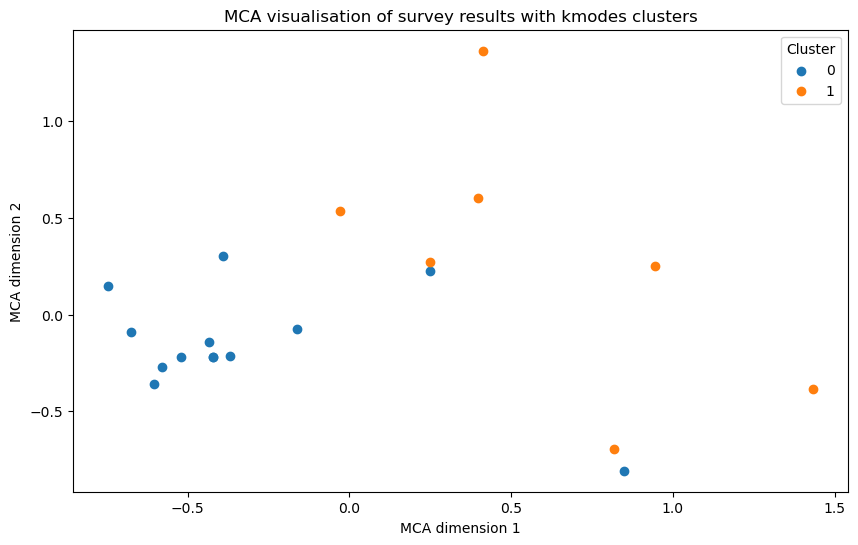

In [13]:
# Use MCA for dimensionality reduction to 2D
from prince import MCA
mca = MCA(n_components=2)
mca_result = mca.fit_transform(df_encoded[columns_for_clustering])

# Add MCA components to the DataFrame
results['MCA1'] = mca_result.iloc[:, 0]
results['MCA2'] = mca_result.iloc[:, 1]

# Plot the clusters in 2D using MCA components
plt.figure(figsize=(10, 6))
for cluster in results['cluster'].unique():
    cluster_data = results[results['cluster'] == cluster]
    plt.scatter(cluster_data['MCA1'], cluster_data['MCA2'], label=f'Cluster {cluster}')

plt.title('MCA visualisation of survey results with kmodes clusters')
plt.xlabel('MCA dimension 1')
plt.ylabel('MCA dimension 2')
L = plt.legend(title="Cluster")
L.get_texts()[0].set_text('0')
L.get_texts()[1].set_text('1')

plt.show()